# test_burgers.ipynb

### Install

In [ ]:
pip install git+https://github.com/grmacchio/dynml.git

### Imports, Random Seeds, and Data Type Settings

In [3]:
from random import seed
from math import floor, pi as pi_math

from matplotlib.pyplot import subplots, show
from torch import exp, float64, linspace, set_default_dtype
from torch.random import manual_seed as torch_manual_seed
from torch.cuda.random import manual_seed as cuda_manual_seed

from dynml.dyn.cont.ode.firstorder.discretize import gen_approx_discrete_sys
from dynml.examples.burgers import Burgers
from dynml.dyn.discrete.numsolve import gen_num_trajs

In [4]:
seed(0)                                                                         # set the random seed
torch_manual_seed(0)                                                            # set the torch random seed
cuda_manual_seed(0)                                                             # set the cuda random seed

In [5]:
set_default_dtype(float64)                                                      # set the default data type

### Generate Physical Trajectory with Gaussian Initial Condition

In [6]:
K = 512                                                                         # set number of fourier modes
L = 2.0 * pi_math                                                               # set the domain length
nu = 0.01                                                                       # set the viscosity parameter
first_order_sys = Burgers(K, L, nu)                                             # semi-linear first order system
dt = 0.001                                                                      # set the time step
disc_meth = 'rk3cn'                                                             # set the discretization method
imp_sol = 'diag'                                                                # set the implicit solver
ds = gen_approx_discrete_sys(first_order_sys, dt, disc_meth, imp_sol)           # generate the discrete system
t_final = 8.0                                                                   # set the final time
N_t = floor(t_final/dt) + 1                                                     # set the number of time samples
dt_plot = 2.0                                                                   # set the time step for the x-axis ticks
dx = L / (2 * K)                                                                # set the space step
x = linspace(0, L, 2 * K + 1)                                                   # generate the space vector
u0 = exp(- (x - pi_math)**2 / 2)                                                # generate the initial condition
x0 = first_order_sys.phys_to_state(u0)                                          # convert the initial condition to the state
def ic():                                                                       # define the initial condition generator
    return x0                                                                   # return the initial condition
traj = gen_num_trajs(ds, ic, 1, N_t, compute='cpu', output='cpu', pbar=True)    # generate the trajectory
u = first_order_sys.state_to_phys(traj)                                         # compute the collocation form of the trajectory

100%|██████████| 8000/8000 [00:02<00:00, 3753.31it/s]


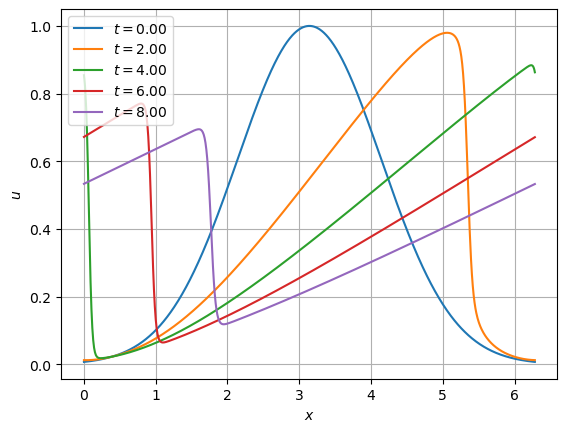

In [7]:
fig, ax = subplots()                                                            # generate the figure
t = linspace(0, t_final, N_t)                                                   # generate the time vector
for i in range(0, N_t, int(dt_plot/dt)):                                        # loop over the samples
    ax.plot(x, u[0, i], label= f'$t = {t[i]:.2f}$')                             # plot the trajectory
ax.legend()                                                                     # add the legend
ax.set_xlabel('$x$')                                                            # set the x-axis label
ax.set_ylabel('$u$')                                                            # set the y-axis label
ax.grid()                                                                       # add the grid
show()                                                                          # show the plot